In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# Create a path

path = r'C:\Users\Owner\Desktop\Data Analyst\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_new.csv'))

In [5]:
df.shape

(86512, 12)

In [6]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [7]:
# drop country and date column

df.drop(columns = ['country', 'date', 'vaccines'])

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0
2,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0
3,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0
4,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,34.0
...,...,...,...,...,...,...,...,...,...
86507,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0
86508,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0
86509,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0
86510,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0


In [8]:
df2 = df.drop(columns = ['country', 'date', 'vaccines'])

In [9]:
df2.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0
2,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0
3,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0
4,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0


### 2. The elbow technique

In [10]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 
score

[-2.5900819464520335e+21,
 -6.57100772064883e+20,
 -4.3283355718401576e+20,
 -2.7206456224307888e+20,
 -2.0739568407022518e+20,
 -1.5588982016415193e+20,
 -1.2049100637058028e+20,
 -9.189679894620737e+19,
 -7.238382550546418e+19]

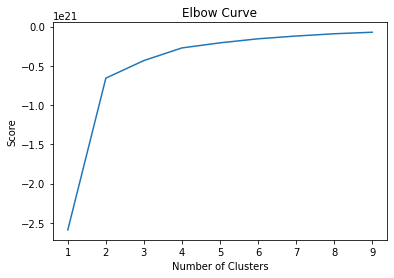

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is four.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [15]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [16]:
df2.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0
2,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0
3,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0
4,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,0


In [17]:
df2['clusters'].value_counts()

0    84967
2     1083
3      235
1      227
Name: clusters, dtype: int64

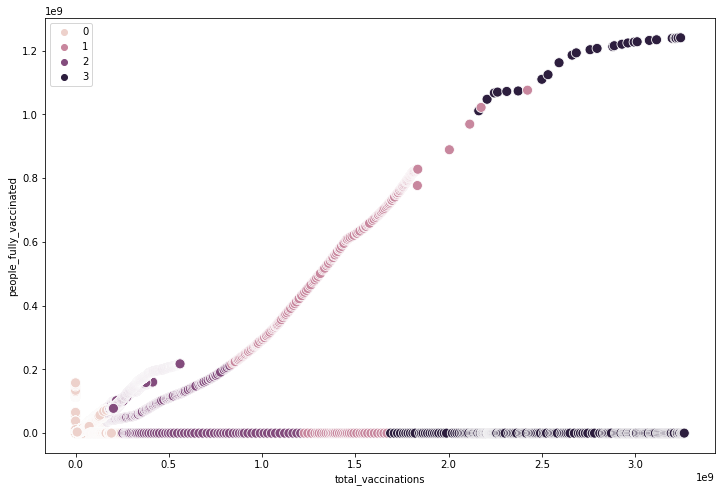

In [18]:
# Plot the clusters for the "total_vaccinations" and "people_fully_vaccinated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['total_vaccinations'], y=df2['people_fully_vaccinated'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('total_vaccinations') 
plt.ylabel('people_fully_vaccinated') 
plt.show()

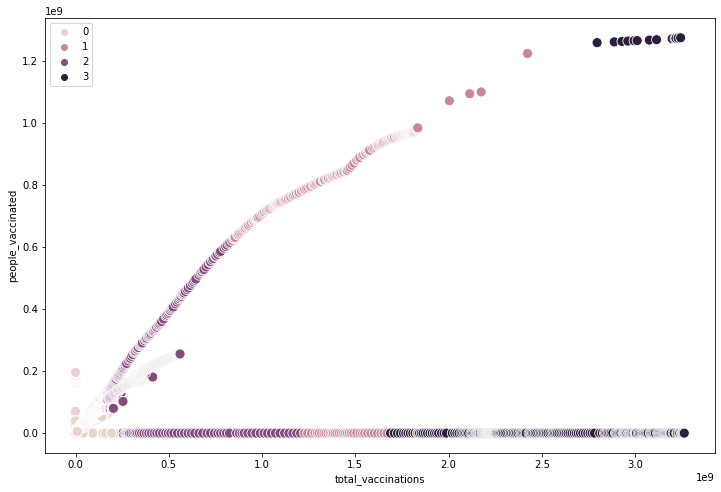

In [19]:
# Plot the clusters for the "total_vaccinations" and "people_fully_vaccinated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['total_vaccinations'], y=df2['people_vaccinated'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('total_vaccinations') 
plt.ylabel('people_vaccinated') 
plt.show()

In [20]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df2.groupby('cluster').agg({'total_vaccinations':['mean', 'median'], 
                         'people_vaccinated':['mean', 'median'], 
                         'people_fully_vaccinated':['mean', 'median'],
                          'daily_vaccinations':['mean', 'median']})

total_vaccinations               people_vaccinated               \
                          mean        median              mean       median   
cluster                                                                       
dark purple       3.525297e+08  3.290114e+08      1.772505e+08  166833338.0   
pink              8.183025e+06  0.000000e+00      4.240258e+06          0.0   
purple            1.419036e+09  1.426347e+09      7.153225e+08  811443992.0   

            people_fully_vaccinated              daily_vaccinations             
                               mean       median               mean     median  
cluster                                                                         
dark purple            1.237549e+08  121738604.0       2.252603e+06  1078806.0  
pink                   3.245389e+06          0.0       6.759970e+04     6844.0  
purple                 4.770402e+08  512106250.0       6.828117e+06  6247433.0

### The models above also doesn't meet the requirements for my analysis. I will need to do further research to find out which model is best fit to find out how the countries are progressing with the vaccination rate.